## Information enriched plots through color, size and hues  
  
Matplotlib can be used to create plots ranging from basic to aesthetically pleasing. There is flexibility to customise the plots in any manner of choosing. In this post, we will be exploring one such usecase.


## Visualization 

Our Main objective is exploration on usage of hues, transparencies and simple layouts to create informative, rich and appealing visualisation.  
- **bar length** (along **horizontal** direction) is **population indicator**  
- **bar length** (along **vertical** direction) is **country size indicator**  
- **Color** of the bar is mapped to **Age expectancy**

## About dataset

Data Source : demographic data from countries in the European Union obtained
from [Wolfram|Alpha](https://www.wolframalpha.com/input/?i=size+and+population+of+countries+in+the+european+union).  
  
Data Set :
Contains information on population, extension and life expectancy in 24 European countries.  

The plot is inspired from the link :  
    https://datasciencelab.wordpress.com/2013/12/21/beautiful-plots-with-pandas-and-matplotlib/

## Approach

The code has been reproduced from the link with all the comments intact. I have done a minor change owing to API changes as the link is dated(2013). The change is : **mpl.colors.Normalize** has been used for instantiation of norm as required for Scalar Mappable.

## Preparing the data

In [2]:
#https://datasciencelab.wordpress.com/2013/12/21/beautiful-plots-with-pandas-and-matplotlib/

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib as mpl
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.lines import Line2D 
from matplotlib import cm
 
countries = ['France','Spain','Sweden','Germany','Finland','Poland','Italy',
             'United Kingdom','Romania','Greece','Bulgaria','Hungary',
             'Portugal','Austria','Czech Republic','Ireland','Lithuania','Latvia',
             'Croatia','Slovakia','Estonia','Denmark','Netherlands','Belgium']

extensions = [547030,504782,450295,357022,338145,312685,301340,243610,238391,
              131940,110879,93028,92090,83871,78867,70273,65300,64589,56594,
              49035,45228,43094,41543,30528]  

populations = [63.8,47,9.55,81.8,5.42,38.3,61.1,63.2,21.3,11.4,7.35,
               9.93,10.7,8.44,10.6,4.63,3.28,2.23,4.38,5.49,1.34,5.61,
               16.8,10.8]  

life_expectancies = [81.8,82.1,81.8,80.7,80.5,76.4,82.4,80.5,73.8,80.8,73.5,
                    74.6,79.9,81.1,77.7,80.7,72.1,72.2,77,75.4,74.4,79.4,81,80.5]  

data = {'extension' : pd.Series(extensions, index=countries), 
        'population' : pd.Series(populations, index=countries),
        'life expectancy' : pd.Series(life_expectancies, index=countries)}
 
df = pd.DataFrame(data)
df = df.sort_values(by = 'life expectancy')
df.head(10)

,extension,population,life expectancy
Lithuania,65300,3.28,72.1
Latvia,64589,2.23,72.2
Bulgaria,110879,7.35,73.5
Romania,238391,21.30,73.8
Estonia,45228,1.34,74.4
Hungary,93028,9.93,74.6
Slovakia,49035,5.49,75.4
Poland,312685,38.30,76.4
Croatia,56594,4.38,77.0
Czech Republic,78867,10.60,77.7


## Creating the Plot

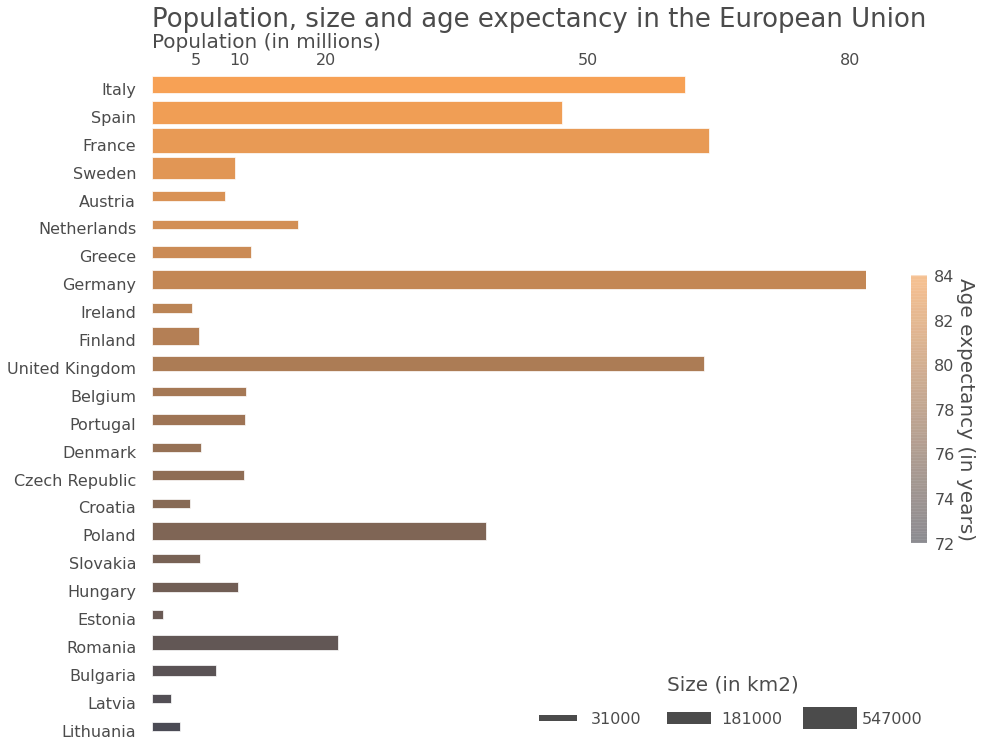

In [5]:
# Create a figure of given size
fig = plt.figure(figsize=(16,12))
# Add a subplot
ax = fig.add_subplot(111)
# Set title
ttl = 'Population, size and age expectancy in the European Union'

# Set color transparency (0: transparent; 1: solid)
a = 0.7
# Create a colormap
customcmap = [(x/24.0,  x/48.0, 0.05) for x in range(len(df))]

# Plot the 'population' column as horizontal bar plot
df['population'].plot(kind='barh', ax=ax, alpha=a, legend=False, color=customcmap,
                      edgecolor='w', xlim=(0,max(df['population'])), title=ttl)

# Remove grid lines (dotted lines inside plot)
ax.grid(False)
# Remove plot frame
ax.set_frame_on(False)
# Pandas trick: remove weird dotted line on axis
#ax.lines[0].set_visible(False)
 
# Customize title, set position, allow space on top of plot for title
ax.set_title(ax.get_title(), fontsize=26, alpha=a, ha='left')
plt.subplots_adjust(top=0.9)
ax.title.set_position((0,1.08))
 
# Set x axis label on top of plot, set label text
ax.xaxis.set_label_position('top')
xlab = 'Population (in millions)'
ax.set_xlabel(xlab, fontsize=20, alpha=a, ha='left')
ax.xaxis.set_label_coords(0, 1.04)
 
# Position x tick labels on top
ax.xaxis.tick_top()
# Remove tick lines in x and y axes
ax.yaxis.set_ticks_position('none')
ax.xaxis.set_ticks_position('none')
 
# Customize x tick lables
xticks = [5,10,20,50,80]
ax.xaxis.set_ticks(xticks)
ax.set_xticklabels(xticks, fontsize=16, alpha=a)
 
# Customize y tick labels
yticks = [item.get_text() for item in ax.get_yticklabels()]
ax.set_yticklabels(yticks, fontsize=16, alpha=a)
ax.yaxis.set_tick_params(pad=12)  


# Set bar height dependent on country extension
# Set min and max bar thickness (from 0 to 1)
hmin, hmax = 0.3, 0.9
xmin, xmax = min(df['extension']), max(df['extension'])

# Function that interpolates linearly between hmin and hmax
f = lambda x: hmin + (hmax-hmin)*(x-xmin)/(xmax-xmin)
# Make array of heights
hs = [f(x) for x in df['extension']]
 
# Iterate over bars
for container in ax.containers:
    # Each bar has a Rectangle element as child
    for i,child in enumerate(container.get_children()):
        # Reset the lower left point of each bar so that bar is centered
        child.set_y(child.get_y()- 0.125 + 0.5-hs[i]/2)
        # Attribute height to each Recatangle according to country's size
        plt.setp(child, height=hs[i])
        
# Legend
# Create fake labels for legend
l1 = Line2D([], [], linewidth=6, color='k', alpha=a) 
l2 = Line2D([], [], linewidth=12, color='k', alpha=a) 
l3 = Line2D([], [], linewidth=22, color='k', alpha=a)
 
# Set three legend labels to be min, mean and max of countries extensions 
# (rounded up to 10k km2)
rnd = 10000
rnd = 10000
 
labels = [str(int(round(l/rnd,1 )*rnd)) \
          for l in [min(df['extension']), np.mean(df['extension']), max(df['extension'])]]  

# Position legend in lower right part
# Set ncol=3 for horizontally expanding legend
leg = ax.legend([l1, l2, l3], labels, ncol=3, frameon=False, fontsize=16, 
                bbox_to_anchor=[1.1, 0.11], handlelength=2, 
                handletextpad=1, columnspacing=2, title='Size (in km2)')
 
# Customize legend title
# Set position to increase space between legend and labels
plt.setp(leg.get_title(), fontsize=20, alpha=a)
leg.get_title().set_position((0, 10))

# Customize transparency for legend labels
[plt.setp(label, alpha=a) for label in leg.get_texts()]

# Create a fake colorbar
ctb = LinearSegmentedColormap.from_list('custombar', customcmap, N=2048)
# Trick from http://stackoverflow.com/questions/8342549/
# matplotlib-add-colorbar-to-a-sequence-of-line-plots
# Used mpl.colors.Normalize for Scalar Mappable
sm = plt.cm.ScalarMappable(cmap=ctb, norm=mpl.colors.Normalize(vmin=72, vmax=84))
# Fake up the array of the scalar mappable
sm._A = []
 
# Set colorbar, aspect ratio
cbar = plt.colorbar(sm, alpha=0.05, aspect=16, shrink=0.4)
cbar.solids.set_edgecolor("face")

# Remove colorbar container frame
cbar.outline.set_visible(False)

# Fontsize for colorbar ticklabels
cbar.ax.tick_params(labelsize=16)

# Customize colorbar tick labels
mytks = range(72,86,2)
cbar.set_ticks(mytks)
cbar.ax.set_yticklabels([str(a) for a in mytks], alpha=a)
 
# Colorbar label, customize fontsize and distance to colorbar
cbar.set_label('Age expectancy (in years)', alpha=a, 
               rotation=270, fontsize=20, labelpad=20)

# Remove color bar tick lines, while keeping the tick labels
cbarytks = plt.getp(cbar.ax.axes, 'yticklines')
plt.setp(cbarytks, visible=False)

plt.show()

#plt.savefig("beautiful plot.png", bbox_inches='tight')

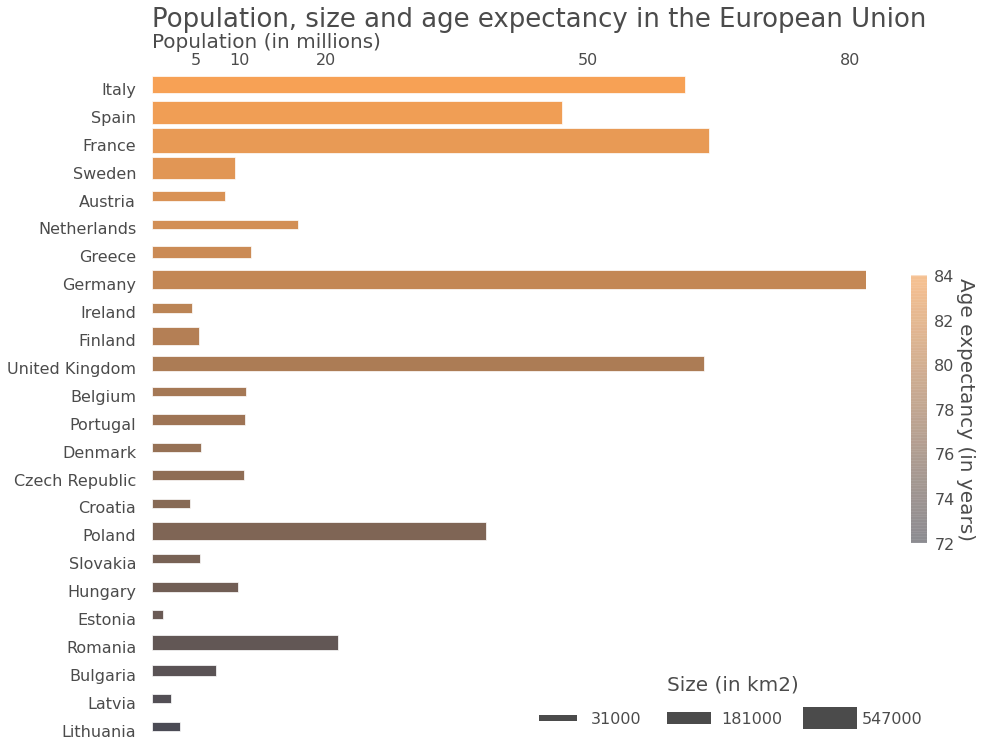

In [1]:
#https://datasciencelab.wordpress.com/2013/12/21/beautiful-plots-with-pandas-and-matplotlib/

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib as mpl
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.lines import Line2D 
from matplotlib import cm
 
countries = ['France','Spain','Sweden','Germany','Finland','Poland','Italy',
             'United Kingdom','Romania','Greece','Bulgaria','Hungary',
             'Portugal','Austria','Czech Republic','Ireland','Lithuania','Latvia',
             'Croatia','Slovakia','Estonia','Denmark','Netherlands','Belgium']

extensions = [547030,504782,450295,357022,338145,312685,301340,243610,238391,
              131940,110879,93028,92090,83871,78867,70273,65300,64589,56594,
              49035,45228,43094,41543,30528]  

populations = [63.8,47,9.55,81.8,5.42,38.3,61.1,63.2,21.3,11.4,7.35,
               9.93,10.7,8.44,10.6,4.63,3.28,2.23,4.38,5.49,1.34,5.61,
               16.8,10.8]  

life_expectancies = [81.8,82.1,81.8,80.7,80.5,76.4,82.4,80.5,73.8,80.8,73.5,
                    74.6,79.9,81.1,77.7,80.7,72.1,72.2,77,75.4,74.4,79.4,81,80.5]  

data = {'extension' : pd.Series(extensions, index=countries), 
        'population' : pd.Series(populations, index=countries),
        'life expectancy' : pd.Series(life_expectancies, index=countries)}
 
df = pd.DataFrame(data)
df = df.sort_values(by = 'life expectancy')


# Create a figure of given size
fig = plt.figure(figsize=(16,12))
# Add a subplot
ax = fig.add_subplot(111)
# Set title
ttl = 'Population, size and age expectancy in the European Union'

# Set color transparency (0: transparent; 1: solid)
a = 0.7
# Create a colormap
customcmap = [(x/24.0,  x/48.0, 0.05) for x in range(len(df))]

# Plot the 'population' column as horizontal bar plot
df['population'].plot(kind='barh', ax=ax, alpha=a, legend=False, color=customcmap,
                      edgecolor='w', xlim=(0,max(df['population'])), title=ttl)

# Remove grid lines (dotted lines inside plot)
ax.grid(False)
# Remove plot frame
ax.set_frame_on(False)
# Pandas trick: remove weird dotted line on axis
#ax.lines[0].set_visible(False)
 
# Customize title, set position, allow space on top of plot for title
ax.set_title(ax.get_title(), fontsize=26, alpha=a, ha='left')
plt.subplots_adjust(top=0.9)
ax.title.set_position((0,1.08))
 
# Set x axis label on top of plot, set label text
ax.xaxis.set_label_position('top')
xlab = 'Population (in millions)'
ax.set_xlabel(xlab, fontsize=20, alpha=a, ha='left')
ax.xaxis.set_label_coords(0, 1.04)
 
# Position x tick labels on top
ax.xaxis.tick_top()
# Remove tick lines in x and y axes
ax.yaxis.set_ticks_position('none')
ax.xaxis.set_ticks_position('none')
 
# Customize x tick lables
xticks = [5,10,20,50,80]
ax.xaxis.set_ticks(xticks)
ax.set_xticklabels(xticks, fontsize=16, alpha=a)
 
# Customize y tick labels
yticks = [item.get_text() for item in ax.get_yticklabels()]
ax.set_yticklabels(yticks, fontsize=16, alpha=a)
ax.yaxis.set_tick_params(pad=12)  


# Set bar height dependent on country extension
# Set min and max bar thickness (from 0 to 1)
hmin, hmax = 0.3, 0.9
xmin, xmax = min(df['extension']), max(df['extension'])
# Function that interpolates linearly between hmin and hmax
f = lambda x: hmin + (hmax-hmin)*(x-xmin)/(xmax-xmin)
# Make array of heights
hs = [f(x) for x in df['extension']]
 
# Iterate over bars
for container in ax.containers:
    # Each bar has a Rectangle element as child
    for i,child in enumerate(container.get_children()):
        # Reset the lower left point of each bar so that bar is centered
        child.set_y(child.get_y()- 0.125 + 0.5-hs[i]/2)
        # Attribute height to each Recatangle according to country's size
        plt.setp(child, height=hs[i])
        
# Legend
# Create fake labels for legend
l1 = Line2D([], [], linewidth=6, color='k', alpha=a) 
l2 = Line2D([], [], linewidth=12, color='k', alpha=a) 
l3 = Line2D([], [], linewidth=22, color='k', alpha=a)
 
# Set three legend labels to be min, mean and max of countries extensions 
# (rounded up to 10k km2)
rnd = 10000
rnd = 10000
 
labels = [str(int(round(l/rnd,1 )*rnd)) for l in [min(df['extension']), np.mean(df['extension']), max(df['extension'])]]
# Position legend in lower right part
# Set ncol=3 for horizontally expanding legend
leg = ax.legend([l1, l2, l3], labels, ncol=3, frameon=False, fontsize=16, 
                bbox_to_anchor=[1.1, 0.11], handlelength=2, 
                handletextpad=1, columnspacing=2, title='Size (in km2)')
 
# Customize legend title
# Set position to increase space between legend and labels
plt.setp(leg.get_title(), fontsize=20, alpha=a)
leg.get_title().set_position((0, 10))
# Customize transparency for legend labels
[plt.setp(label, alpha=a) for label in leg.get_texts()]

# Create a fake colorbar
ctb = LinearSegmentedColormap.from_list('custombar', customcmap, N=2048)
# Trick from http://stackoverflow.com/questions/8342549/
# matplotlib-add-colorbar-to-a-sequence-of-line-plots
# Used mpl.colors.Normalize for Scalar Mappable
sm = plt.cm.ScalarMappable(cmap=ctb, norm=mpl.colors.Normalize(vmin=72, vmax=84))
# Fake up the array of the scalar mappable
sm._A = []
 
# Set colorbar, aspect ratio
cbar = plt.colorbar(sm, alpha=0.05, aspect=16, shrink=0.4)
cbar.solids.set_edgecolor("face")
# Remove colorbar container frame
cbar.outline.set_visible(False)
# Fontsize for colorbar ticklabels
cbar.ax.tick_params(labelsize=16)
# Customize colorbar tick labels
mytks = range(72,86,2)
cbar.set_ticks(mytks)
cbar.ax.set_yticklabels([str(a) for a in mytks], alpha=a)
 
# Colorbar label, customize fontsize and distance to colorbar
cbar.set_label('Age expectancy (in years)', alpha=a, 
               rotation=270, fontsize=20, labelpad=20)
# Remove color bar tick lines, while keeping the tick labels
cbarytks = plt.getp(cbar.ax.axes, 'yticklines')
plt.setp(cbarytks, visible=False)

plt.savefig("beautiful plot.png", bbox_inches='tight')

## Useful links 

- [Colormap reference](https://matplotlib.org/stable/gallery/color/colormap_reference.html) for a list of builtin colormaps.  - [Creating Colormaps](https://matplotlib.org/stable/tutorials/colors/colormap-manipulation.html) in Matplotlib for examples of how to make colormaps.  
- [Choosing Colormaps](https://matplotlib.org/stable/tutorials/colors/colormaps.html) in Matplotlib an in-depth discussion of choosing colormaps.  
- [Colormap Normalization](https://matplotlib.org/stable/tutorials/colors/colormapnorms.html) for more details about data normalization.  
- [Customized Colorbars tutorials](https://matplotlib.org/stable/tutorials/colors/colorbar_only.html)